In [1]:
import pandas as pd
import re

# --- 1. SETUP: COLUMN CLEANING FUNCTION ---
def clean_col_name(col):
    """Converts column names to lowercase snake_case."""
    name = col.lower()
    name = re.sub(r'[()\s-]+', '_', name)
    name = name.strip('_')
    name = re.sub(r'__+', '_', name)
    return name

# Load the dataset (or use your currently processed DataFrame)
file_name = "kaggle - synthetic fitness and nutrition data.csv"
df = pd.read_csv(file_name)
df['Age'] = df['Age'].astype(int)

# Apply the cleaning function to all column names
df.columns = [clean_col_name(col) for col in df.columns.tolist()]


# --- 2. COLUMN DEFINITION ---

# Columns relevant to both domains (demographics, base metrics)
shared_cols = [
    'age', 'gender', 'weight_kg', 'height_m', 'bmi', 'bmi_calc',
    'fat_percentage', 'water_intake_liters', 'lean_mass_kg'
]

# Columns primarily related to nutrition (meal details, macro calculations)
nutrition_specific_cols = [
    'daily_meals_frequency', 'carbs', 'proteins', 'fats', 'calories',
    'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg',
    'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
    # 'physical_exercise' is arguably more fitness, but let's leave it in workout for now.
]
# 'rating'

# Columns primarily related to workout/fitness (session details, heart rate, exercise specifics)
workout_specific_cols = [
    'max_bpm', 'avg_bpm', 'resting_bpm', 'session_duration_hours',
    'calories_burned', 'experience_level', 'workout_type', 'sets', 'reps',
    'difficulty_level', 'body_part',
     'cal_balance', 'burns_calories_bin'
]
# 'pct_hrr', 'pct_maxhr', 'physical_exercise', 'burns_calories_per_30_min', 'type_of_muscle', 'workout', 'expected_burn', 'equipment_needed', 'exercise_name', 'workout_frequency_days_week'
# future use: 'target_muscle_group', 'benefit',

# --- 3. CREATE & EXPORT DATAFRAMES ---

# Create the full list of columns for each new DataFrame
nutrition_cols = shared_cols + nutrition_specific_cols
workout_cols = shared_cols + workout_specific_cols

# Create the two DataFrames
nutrition_df = df[nutrition_cols]
workout_df = df[workout_cols]

# Export the new DataFrames
#####nutrition_df.to_csv('nutrition_data.csv', index=False)
#####workout_df.to_csv('workout_data.csv', index=False)

print("Data successfully split and exported to 'nutrition_data.csv' and 'workout_data.csv'.")

Data successfully split and exported to 'nutrition_data.csv' and 'workout_data.csv'.


In [2]:
nutrition_df

,age,gender,weight_kg,height_m,bmi,bmi_calc,fat_percentage,water_intake_liters,lean_mass_kg,daily_meals_frequency,...,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,cal_from_macros,pct_carbs,protein_per_kg
0,34,Male,65.27,1.62,24.87,24.870447,26.800377,1.50,47.777394,2.99,...,31.77,1729.94,285.05,120.47,Grilled,16.24,110.79,2139.59,0.500432,1.624789
1,23,Female,56.41,1.55,23.48,23.479709,27.655021,1.90,40.809803,3.01,...,12.34,693.08,300.61,109.15,Fried,16.47,12.01,1711.65,0.500850,1.514093
2,33,Female,58.98,1.67,21.15,21.148123,24.320821,1.88,44.635580,1.99,...,42.81,2142.48,215.42,399.43,Boiled,54.35,6.09,1965.92,0.500610,1.663445
3,38,Female,93.78,1.70,32.45,32.449827,32.813572,2.50,63.007432,3.00,...,9.34,123.20,9.70,314.31,Fried,27.73,103.72,1627.28,0.499533,0.862017
4,45,Male,52.42,1.88,14.83,14.831372,17.307319,2.91,43.347504,3.00,...,23.78,1935.11,116.89,99.22,Baked,34.16,46.55,2659.23,0.500581,2.538153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46,Female,98.31,1.90,27.23,27.232687,27.505498,2.99,71.269345,3.03,...,32.98,1241.30,243.54,190.52,Boiled,41.69,91.78,1882.80,0.500000,0.954837
19996,40,Female,88.12,1.87,25.20,25.199462,26.180562,3.52,65.049689,2.97,...,32.17,1853.10,188.76,468.81,Boiled,20.80,12.98,1205.47,0.496968,0.689060
19997,50,Male,46.20,1.67,16.57,16.565671,23.331802,2.81,35.420708,3.00,...,14.48,1808.43,80.47,244.51,Grilled,23.04,61.14,1947.79,0.500280,2.105844
19998,52,Male,44.30,1.62,16.88,16.880049,18.985868,1.59,35.889260,2.00,...,13.68,2125.57,245.91,402.26,Roasted,39.25,99.85,1921.51,0.499940,2.190745


In [3]:
workout_df

,age,gender,weight_kg,height_m,bmi,bmi_calc,fat_percentage,water_intake_liters,lean_mass_kg,max_bpm,...,session_duration_hours,calories_burned,experience_level,workout_type,sets,reps,difficulty_level,body_part,cal_balance,burns_calories_bin
0,34,Male,65.27,1.62,24.87,24.870447,26.800377,1.50,47.777394,188.58,...,1.00,1080.90,2.01,Strength,4.99,20.91,Advanced,Legs,725.10,Medium
1,23,Female,56.41,1.55,23.48,23.479709,27.655021,1.90,40.809803,179.43,...,1.37,1809.91,2.01,HIIT,4.01,16.15,Intermediate,Chest,-232.91,High
2,33,Female,58.98,1.67,21.15,21.148123,24.320821,1.88,44.635580,175.04,...,0.91,802.26,1.02,Cardio,5.00,21.90,Intermediate,Arms,805.74,High
3,38,Female,93.78,1.70,32.45,32.449827,32.813572,2.50,63.007432,191.21,...,1.10,1450.79,1.99,HIIT,4.01,16.92,Advanced,Shoulders,1206.21,High
4,45,Male,52.42,1.88,14.83,14.831372,17.307319,2.91,43.347504,193.58,...,1.08,1166.40,2.00,Strength,4.99,15.01,Advanced,Abs,303.60,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46,Female,98.31,1.90,27.23,27.232687,27.505498,2.99,71.269345,199.20,...,0.77,761.61,1.00,Strength,4.99,17.14,Advanced,Arms,1865.39,Medium
19996,40,Female,88.12,1.87,25.20,25.199462,26.180562,3.52,65.049689,196.18,...,1.97,2303.13,2.99,Strength,5.01,23.08,Intermediate,Arms,173.87,Low
19997,50,Male,46.20,1.67,16.57,16.565671,23.331802,2.81,35.420708,163.34,...,1.36,1468.80,2.00,Strength,4.00,18.91,Beginner,Forearms,-43.80,High
19998,52,Male,44.30,1.62,16.88,16.880049,18.985868,1.59,35.889260,179.27,...,1.41,929.75,1.00,Yoga,3.99,24.97,Intermediate,Shoulders,346.25,Low


In [4]:
# Manual mapping for ordinal features
difficulty_mapping = {'Beginner': 0, 'Intermediate': 1, 'Advanced': 2}
intensity_mapping = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3}

workout_df['difficulty_level_enc'] = workout_df['difficulty_level'].map(difficulty_mapping)
workout_df['intensity_of_burn_enc'] = workout_df['burns_calories_bin'].map(intensity_mapping)

workout_df = workout_df.drop(columns=['difficulty_level', 'burns_calories_bin'])
workout_df

C:\Users\lewig\AppData\Local\Temp\ipykernel_1824\4292120972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workout_df['difficulty_level_enc'] = workout_df['difficulty_level'].map(difficulty_mapping)
C:\Users\lewig\AppData\Local\Temp\ipykernel_1824\4292120972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  workout_df['intensity_of_burn_enc'] = workout_df['burns_calories_bin'].map(intensity_mapping)


,age,gender,weight_kg,height_m,bmi,bmi_calc,fat_percentage,water_intake_liters,lean_mass_kg,max_bpm,...,session_duration_hours,calories_burned,experience_level,workout_type,sets,reps,body_part,cal_balance,difficulty_level_enc,intensity_of_burn_enc
0,34,Male,65.27,1.62,24.87,24.870447,26.800377,1.50,47.777394,188.58,...,1.00,1080.90,2.01,Strength,4.99,20.91,Legs,725.10,2,1
1,23,Female,56.41,1.55,23.48,23.479709,27.655021,1.90,40.809803,179.43,...,1.37,1809.91,2.01,HIIT,4.01,16.15,Chest,-232.91,1,2
2,33,Female,58.98,1.67,21.15,21.148123,24.320821,1.88,44.635580,175.04,...,0.91,802.26,1.02,Cardio,5.00,21.90,Arms,805.74,1,2
3,38,Female,93.78,1.70,32.45,32.449827,32.813572,2.50,63.007432,191.21,...,1.10,1450.79,1.99,HIIT,4.01,16.92,Shoulders,1206.21,2,2
4,45,Male,52.42,1.88,14.83,14.831372,17.307319,2.91,43.347504,193.58,...,1.08,1166.40,2.00,Strength,4.99,15.01,Abs,303.60,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46,Female,98.31,1.90,27.23,27.232687,27.505498,2.99,71.269345,199.20,...,0.77,761.61,1.00,Strength,4.99,17.14,Arms,1865.39,2,1
19996,40,Female,88.12,1.87,25.20,25.199462,26.180562,3.52,65.049689,196.18,...,1.97,2303.13,2.99,Strength,5.01,23.08,Arms,173.87,1,0
19997,50,Male,46.20,1.67,16.57,16.565671,23.331802,2.81,35.420708,163.34,...,1.36,1468.80,2.00,Strength,4.00,18.91,Forearms,-43.80,0,2
19998,52,Male,44.30,1.62,16.88,16.880049,18.985868,1.59,35.889260,179.27,...,1.41,929.75,1.00,Yoga,3.99,24.97,Shoulders,346.25,1,0


In [5]:
# Identify all remaining object columns (Nominal Features)
nominal_cols = workout_df.select_dtypes(include=['object']).columns.tolist()
print("Nominal columns to encode:", nominal_cols)

# Apply One-Hot Encoding
workout_df_processed = pd.get_dummies(workout_df, columns=nominal_cols, drop_first=True)
print(f"\nFinal processed shape after encoding: {workout_df_processed.shape}")

workout_df_processed

Nominal columns to encode: ['gender', 'workout_type', 'body_part']

Final processed shape after encoding: (20000, 29)


,age,weight_kg,height_m,bmi,bmi_calc,fat_percentage,water_intake_liters,lean_mass_kg,max_bpm,avg_bpm,...,gender_Male,workout_type_HIIT,workout_type_Strength,workout_type_Yoga,body_part_Arms,body_part_Back,body_part_Chest,body_part_Forearms,body_part_Legs,body_part_Shoulders
0,34,65.27,1.62,24.87,24.870447,26.800377,1.50,47.777394,188.58,157.65,...,True,False,True,False,False,False,False,False,True,False
1,23,56.41,1.55,23.48,23.479709,27.655021,1.90,40.809803,179.43,131.75,...,False,True,False,False,False,False,True,False,False,False
2,33,58.98,1.67,21.15,21.148123,24.320821,1.88,44.635580,175.04,123.95,...,False,False,False,False,True,False,False,False,False,False
3,38,93.78,1.70,32.45,32.449827,32.813572,2.50,63.007432,191.21,155.10,...,False,True,False,False,False,False,False,False,False,True
4,45,52.42,1.88,14.83,14.831372,17.307319,2.91,43.347504,193.58,152.88,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46,98.31,1.90,27.23,27.232687,27.505498,2.99,71.269345,199.20,148.18,...,False,False,True,False,True,False,False,False,False,False
19996,40,88.12,1.87,25.20,25.199462,26.180562,3.52,65.049689,196.18,134.18,...,False,False,True,False,True,False,False,False,False,False
19997,50,46.20,1.67,16.57,16.565671,23.331802,2.81,35.420708,163.34,157.92,...,True,False,True,False,False,False,False,True,False,False
19998,52,44.30,1.62,16.88,16.880049,18.985868,1.59,35.889260,179.27,121.23,...,True,False,False,True,False,False,False,False,False,True


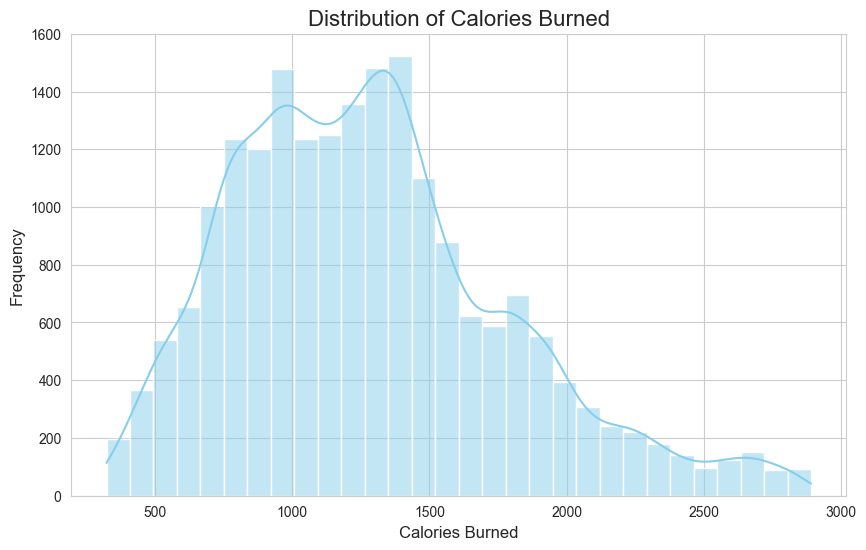

C:\Users\lewig\AppData\Local\Temp\ipykernel_1824\4290765971.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='workout_type', y='calories_burned', data=workout_df, palette='viridis')


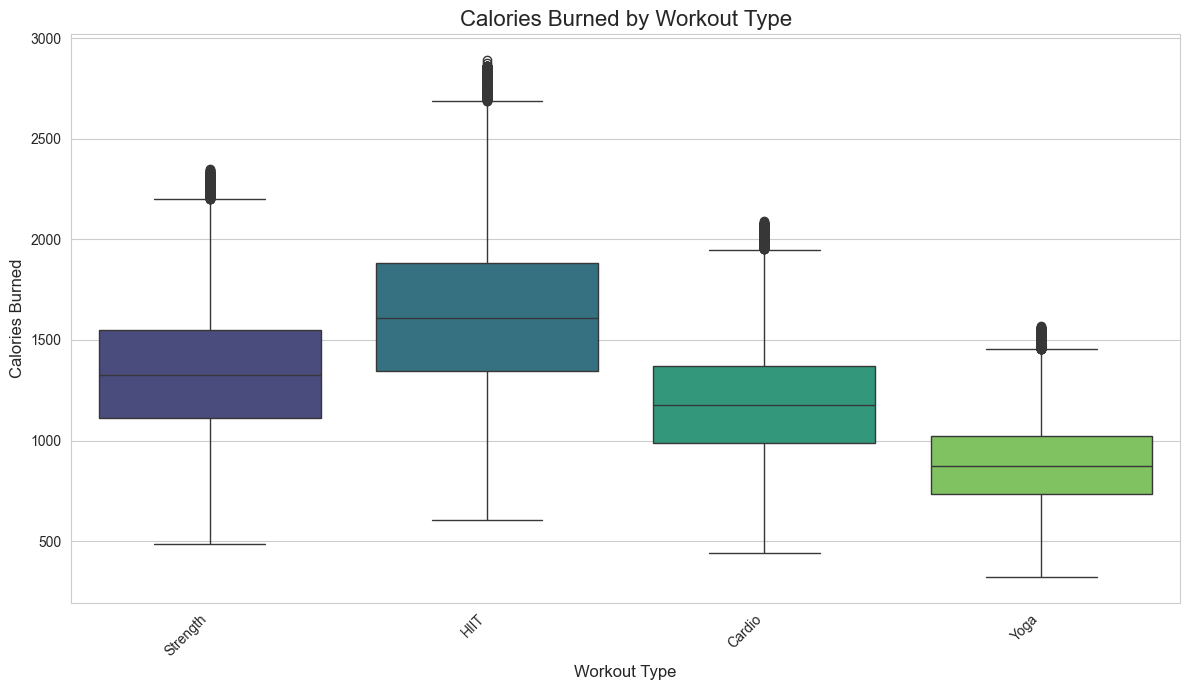

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better visualization
sns.set_style("whitegrid")

# --- CHART 1: Distribution of Calories Burned (Numerical Feature) ---
plt.figure(figsize=(10, 6))
sns.histplot(workout_df['calories_burned'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Calories Burned', fontsize=16)
plt.xlabel('Calories Burned', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show() # In PyCharm/VS Code, you may use plt.show() or savefig()

# --- CHART 2: Calories Burned vs. Workout Type (Numerical vs. Categorical) ---
plt.figure(figsize=(12, 7))
sns.boxplot(x='workout_type', y='calories_burned', data=workout_df, palette='viridis')
plt.title('Calories Burned by Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # In PyCharm/VS Code, you may use plt.show() or savefig()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- 1. DATA SETUP ---

# Define the column cleaning function (necessary to match your working data)
def clean_col_name(col):
    name = col.lower()
    name = re.sub(r'[()\s-]+', '_', name)
    name = name.strip('_')
    name = re.sub(r'__+', '_', name)
    return name

# Load the dataset and apply cleaning
file_name = "kaggle - synthetic fitness and nutrition data.csv"
df = pd.read_csv(file_name)
df.columns = [clean_col_name(col) for col in df.columns.tolist()]

# The features to analyze
features_to_plot = ['age', 'fat_percentage', 'water_intake_liters']

# --- 2. CODE FOR CHARTS/GRAPHS (Distribution Plots) ---

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

for i, col in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    # Use histplot with KDE to show both the bars and the smooth estimated distribution line
    sns.histplot(df[col], kde=True, bins=30, color='teal', edgecolor='black')

    # Customize the title based on the feature
    title_name = col.replace('_', ' ').title()
    plt.title(f'Distribution of {title_name}', fontsize=16)
    plt.xlabel(title_name, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
#plt.savefig('distribution_age_fat_water.png')
plt.close()
print("Generated distribution_age_fat_water.png")

Generated distribution_age_fat_water.png


In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
plot_df = df[['age', 'weight_kg', 'fat_percentage']].copy()
# Create a scatter plot with hue determined by 'fat_percentage'
scatter = sns.scatterplot(
    x='age',
    y='weight_kg',
    hue='fat_percentage',
    data=plot_df,
    palette='viridis',
    s=50, # size of the points
    alpha=0.6 # transparency
)

# Add title and labels
plt.title('Age vs. Weight, Colored by Fat Percentage', fontsize=18)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)

# Move the legend outside the plot area
plt.legend(title='Fat Percentage', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
#plt.savefig('age_vs_weight_by_fat_percentage.png')
plt.close()

print("Generated age_vs_weight_by_fat_percentage.png")

Generated age_vs_weight_by_fat_percentage.png


In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Use regplot to show the scatter plot and automatically fit a linear regression line
# to visualize the trend between BMI and resting_bpm.
sns.regplot(
    x='bmi',
    y='resting_bpm',
    data=df,
    scatter_kws={'alpha':0.4, 's':10}, # Adjust point transparency and size
    line_kws={'color':'red'} # Set color of the regression line
)

plt.title('Relationship between BMI and Resting Heart Rate (BPM)', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Resting Heart Rate (BPM)', fontsize=12)
plt.tight_layout()
#plt.savefig('bmi_vs_resting_bpm_scatter.png')
plt.close()

print("Generated bmi_vs_resting_bpm_scatter.png")

Generated bmi_vs_resting_bpm_scatter.png


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
plot_df = df[['age', 'weight_kg', 'fat_percentage']].copy()
# Create a scatter plot with hue determined by 'fat_percentage'
scatter = sns.scatterplot(
    x='age',
    y='weight_kg',
    hue='fat_percentage',
    data=plot_df,
    palette='viridis',
    s=50,  # size of the points
    alpha=0.6  # transparency
)

# Add title and labels
plt.title('Age vs. Weight, Colored by Fat Percentage', fontsize=18)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)

# Move the legend outside the plot area
plt.legend(title='Fat Percentage', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
#plt.savefig('age_vs_weight_by_fat_percentage.png')
plt.close()

print("Generated age_vs_weight_by_fat_percentage.png")


In [10]:
## EXPORTS THE CLEANED DATA

#nutrition_df.to_csv('nutrition_data.csv', index=False)
#workout_df_processed.to_csv('workout_data.csv', index=False)